In [1]:
from rdkit import Chem
import pandas as pd

from rdkit.Chem.Draw import IPythonConsole
from tqdm.notebook import tqdm
from rdkit.Chem.AllChem import ReactionFromSmarts

import matplotlib.pyplot as plt

import numpy as np

from tqdm.notebook import tqdm

import coupling_utils
import multiprocessing as mp

In [2]:
def get_NO_count(smiles):
    return(np.sum([smiles.count(char) for char in "NnOo"]))

In [3]:
finasteride_acid = Chem.MolFromSmiles("[H][C@@]12CC[C@H](C(O)=O)[C@@]1(C)CC[C@@]3([H])[C@@]2([H])CC[C@@]4([H])NC(C=C[C@]34C)=O")

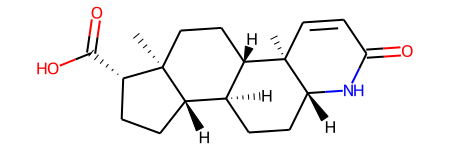

In [4]:
finasteride_acid

In [5]:
amidep = Chem.MolFromSmarts('[N;$(NC=[O,S,N])]')

In [6]:
#

In [8]:
pubchem_small_amines = []

for file_ind in tqdm(range(112)):
    
    file_tag = str(file_ind).zfill(3)
    amines = pd.read_csv(f"../Docking_MPro/pubchem/pubchem_small_{file_tag}.txt",names = ["smiles","size","FC"])
    amines["NO_count"] = amines.smiles.apply(get_NO_count)
    pubchem_small_amines.append(amines)

  0%|          | 0/112 [00:00<?, ?it/s]

In [9]:
amines = pd.concat(pubchem_small_amines)

In [10]:
amines.drop_duplicates("smiles",inplace=True)

In [11]:
amines.reset_index(drop=True,inplace=True)

In [12]:
NOs = []
for i in range(np.max(amines.NO_count)):
    NOs.append((i, len(amines[amines.NO_count <= i])))


In [13]:
amideN = Chem.MolFromSmarts('[N;$(NC=[O,S,N])]')
amidecoup = ReactionFromSmarts('[C:1](=[O:2])[OH1].[N!H0:3]>>[C:1](=[O:2])[N:3]')

In [14]:
small_amines = list(amines[amines.NO_count <= 3].smiles)

In [ ]:
if __name__ == '__main__':
    with mp.Pool(32) as p:
        result = p.map(coupling_utils.couple_amide, small_amines,chunksize=100000)


In [ ]:
out = pd.DataFrame({"smiles":result})

In [ ]:
out.head()

In [ ]:
out.to_csv("./Finasteride_products/Finasteride_amides.csv")